# matplotlib: quick (and partial) summary
Marco Chierici & Giuseppe Jurman

May 4, 2022

(partially abridged from [Machine Learning Plus](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) & [matplotlib.org](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)


## Kick off

We'll work in a **Jupyter Notebook**, which is a web application for creating and sharing computational documents, mixing Markdown-formatted text and code.

First, you'll need to start the Jupyter server. 

* The easiest way to do this is to open Anaconda Navigator and then launch Jupyter Notebook from there.

![](https://docs.anaconda.com/_images/nav-defaults1.png)

* Alternatively, open up a terminal window and execute the command `jupyter notebook`.

In any case, you should end up with a new tab in your default web browser, with the URL `http://localhost:8888/tree`.

## Intro

Everything in *matplotlib* is hierarchally organized. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the `matplotlib.pyplot` module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user creates figures with `pyplot`, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

### Parts of a figure
![](https://matplotlib.org/stable/_images/anatomy.png)

### Figure

This is the entire figure. 

The figure keeps track of all the child Axes, a group of special "Artists" (titles, figure legends, etc), nested subfigures, and the canvas. 

(Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but it is more-or-less invisible to you as the user).

A figure can have any number of Axes, but to be useful it should have at least one.

The easiest way to create a new figure is with pyplot:

In [1]:
# import required modules
import matplotlib.pyplot as plt
import numpy as np
# the following is a Jupyter notebook "magic" - it lets you see the plots within the notebook
%matplotlib inline

In [5]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 640x480 with 0 Axes>

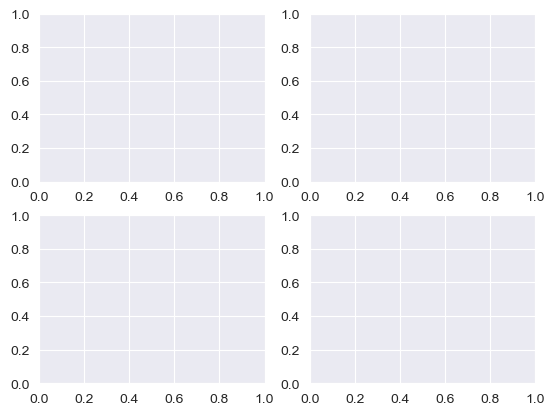

In [3]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In [6]:
ax_lst.shape

(2, 2)

###  Axes

This is what you think of as 'a plot'. It is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The **Axes** contains two (or three in the case of 3D) **Axis** objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via `set_xlim()` and `set_ylim()` Axes methods). 

Each Axes has:

1. a title (set via `set_title()`);
1. a x-label (set via `set_xlabel()`);
1. a y-label (set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the object-oriented programming (OOP) interface.

### Axis

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist

Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

---
Let's start now with some basic examples: first, let’s see what `plt.plot()` creates if you call it on an arbitrary sequence of numbers.

In [ ]:
plt.plot([1, 2, 3, 4, 10])

I just gave a list of numbers to plt.plot() and it drew a **line chart** automatically. It assumed the values of the X-axis to start from zero going up to as many items in the data.

Notice the line `matplotlib.lines.Line2D` in code output?

That’s because Matplotlib returns the plot object itself besides drawing the plot.

If you only want to see the plot (e.g. in a non-interactive script), add `plt.show()` at the end and execute all the lines in one shot.

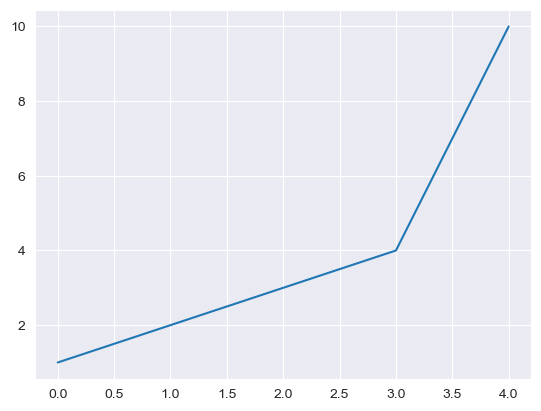

In [7]:
plt.plot([1, 2, 3, 4, 10])
plt.show()

So, this is not a scatterplot yet, but a line chart.

How to draw a real scatterplot instead?

To do that, let’s understand a bit more about what arguments `plt.plot()` expects. The three basic arguments are: `plt.plot(x, y, format)` (in this specific order!)

The `format` is a string representing a shorthand combination of *{color}{marker}{line}*.

For example, the format `'go-'` has 3 characters standing for: *‘green colored dots with solid line’*.

By omitting the line part (`‘-‘`) in the end, you will be left with only green dots (`‘go’`), which makes it draw a scatterplot.

Few commonly used short hand format examples are:
* `'r*--'` : ‘red stars with dashed lines’
* `'ks:'` : ‘black squares with dotted line’ (‘k’ stands for black)
* `'bD-.'` : ‘blue diamonds with dash-dot line’.

For a complete list of colors, markers and linestyles, check out the `help(plt.plot)` command.

Let's draw a scatterplot with green dots:

In [ ]:
# 'go' stands for green dots
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], 'go')
plt.show()

Now how to plot another set of 5 points of different color in the same figure?

Simply call `plt.plot()` again, it will add those point to the same picture.

You might wonder, why it does not draw these points in a new panel altogether? I will come to that in the next section.

In [ ]:
# Draw two sets of points
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go")  # green dots
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*")  # blue stars
plt.show()

Looks good. Now let’s add the basic plot features: Title, Legend, X and Y axis labels. How to do that?

The `plt` object has corresponding methods to add each of this.

In [ ]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go", label="GreenDots")  # we attach a label to be used by the legend
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*", label="Bluestars")
plt.title("A Simple Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best")  # legend text comes from the plot's label parameter
plt.show()

# other choices for loc are: 'upper right', 'lower right', 'center', 'right', 'center right' (similarly for left)

Now, how to increase the size of the plot?

The easy way to do it is by setting the `figsize` inside `plt.figure()` method. We also set the xy axis limits.

In [ ]:
plt.figure(figsize=(10, 7))  # (width, height)
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go", label="GreenDots")  # green dots
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*", label="Bluestars")  # blue stars
plt.title("A Simple Scatterplot")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 6) # x axis limits
plt.ylim(0, 12) # y axis limits
plt.legend(loc="best")
plt.show()

Ok, we have some new lines of code there. What does `plt.figure` do?

Every plot that matplotlib makes is drawn on something called 'figure'. You can think of the figure object as a canvas that holds all the subplots and other plot elements inside it.

A figure can have one or more subplots inside it called Axes, arranged in rows and columns. Every figure has at least one Axes. (Again, don't confuse Axes with X and Y axis, they are different!)

## How to draw 2 scatterplots in different panels

Let’s understand figure and axes in little more detail.

Suppose I want to draw our two sets of points (green rounds and blue stars) in two separate plots side-by-side instead of the same plot. 

You can do that by creating two separate subplots, or Axes, using `plt.subplots(1, 2)`: this means to creates 1 row with 2 subplots. The command returns two objects:

1. the figure
1. the axes (subplots) inside the figure

![](https://www.machinelearningplus.com/wp-content/uploads/2019/01/99_matplotlib_structure-1.png)

Previously, I called `plt.plot()` to draw the points. Since there was only one axes by default, it drew the points on that axes itself.

But now, since you want the points drawn on different subplots (axes), you have to call the plot function in the respective axes (`ax1` and `ax2` in below code) instead of `plt`.

Notice in below code, I call `ax1.plot()` and `ax2.plot()` instead of calling `plt.plot()` twice.

In [ ]:
# Create Figure and Subplots, capturing them in separate variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True, dpi=100)

# Plot
ax1.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go")  # greendots
ax2.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*")  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title("Scatterplot Greendots")
ax2.set_title("Scatterplot Bluestars")
ax1.set_xlabel("X")
ax2.set_xlabel("X")  # x label
ax1.set_ylabel("Y")
ax2.set_ylabel("Y")  # y label
ax1.set_xlim(0, 6)
ax2.set_xlim(0, 6)  # x axis limits
ax1.set_ylim(0, 12)
ax2.set_ylim(0, 12)  # y axis limits

# ax2.yaxis.set_ticks_position('none')
plt.tight_layout()
plt.show()

Setting `sharey=True` in `plt.subplots()` shares the Y axis between the two subplots.

`dpi=100` increased the number of dots per inch of the plot to make it look more sharp and clear. You will notice a distinct improvement in clarity on increasing the dpi, especially in Jupyter notebooks.

Thats sounds like a lot of functions to learn. It's actually quite easy to remember them.

The `ax1` and `ax2` objects, like `plt`, have equivalent `set_title`, `set_xlabel` and `set_ylabel` functions. In fact, `plt.title()` actually calls the current axes `set_title()` to do the job.

* `plt.xlabel()` → `ax.set_xlabel()`
* `plt.ylabel()` → `ax.set_ylabel()`
* `plt.xlim()` → `ax.set_xlim()`
* `plt.ylim()` → `ax.set_ylim()`
* `plt.title()` → `ax.set_title()`

Alternately, to save keystrokes, you can set multiple things in one go using the `ax.set()`:

In [ ]:
ax1.set(
    title="Scatterplot Greendots", xlabel="X", ylabel="Y", xlim=(0, 6), ylim=(0, 12)
)
ax2.set(
    title="Scatterplot Bluestars", xlabel="X", ylabel="Y", xlim=(0, 6), ylim=(0, 12)
)


> Why does the above code is formatted in that seemingly weird way?
>
> It uses ["Black formatting"](https://black.readthedocs.io/en/stable/the_black_code_style/current_style.html), a PEP 8 compliant formatter for Python code.
>
> For example, the Black formatter puts one full expression or single statement per line: if this does not fit the allotted line length, then Black will look at the contents of the first outer matching brackets and put that in a separate indented line. If this line does not fit the line length, the process is repeated.
>
> You'll see more examples of Black formatting in this notebook.

## Object-Oriented Syntax vs Matlab-like Syntax

A common problem while learning matplotlib is that it has two coding interfaces:

* Matlab-like syntax
* Object-oriented (OO) syntax.

This is partly the reason why matplotlib doesn't have one consistent way of achieving the same given output, making it a bit difficult to understand for newcomers.

The syntax you have seen so far is the OO syntax, which is more intuitive and pythonic to work with.

However, since the original purpose of matplotlib was to recreate the plotting facilities of Matlab in Python, the Matlab-like syntax is retained and still works.

The Matlab syntax is ‘stateful’.

That means that `plt` keeps track of what the current axes is. So whatever you draw with `plt.{anything}` will be reflected only on the **current** subplot.

In practice, the main difference between the two syntaxes is

* matlab syntax: all plotting is done using plt methods
* OO syntax: all plotting is done using the respective axes' methods

So, how to recreate the above multi-subplots figure (or any other figure for that matter) using Matlab syntax?

The general procedure is:

* You manually create one subplot at a time (using `plt.subplot()` or `plt.add_subplot()`) and 
* immediately call `plt.plot()` or `plt.{anything}` to modify that specific subplot (axes). 

Whatever method you call using `plt` will be drawn in the current axes.

The code below shows this in practice.

In [ ]:
# Matlab-like syntax
plt.figure(figsize=(10, 4), dpi=100)  # figsize=(width, height)

# Left hand side plot
plt.subplot(1, 2, 1)  # (nRows, nColumns, axes number to plot)
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 10], "go")  # green dots
plt.title("Scatterplot Greendots")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 6)
plt.ylim(0, 12)

# Right hand side plot
plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4, 5], [2, 3, 4, 5, 11], "b*")  # blue stars
plt.title("Scatterplot Bluestars")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 6)
plt.ylim(0, 12)
plt.show()

Let’s breakdown the above piece of code.

In `plt.subplot(1,2,1)`, the first two values (1,2) specify the number of rows (1) and columns (2), and the third value (1) specifies the position of the current subplot. The subsequent `plt` functions will always draw on this current subplot.

You can get a reference to the current (subplot) axes with `plt.gca()` ("get current axis") and the current figure with `plt.gcf()` ("get current figure"). Likewise, `plt.cla()` and `plt.clf()` will clear the current axes and figure respectively.

Now, compare the above code with the object oriented (OO) version. The OO version might look a but confusing because it has a mix of both `ax1` and `plt` commands.

However, there is a significant advantage with the OO approach.

Since `plt.subplots` returns all the axes as separate objects, you can avoid writing repetitive code by looping through the axes.

Always remember: `plt.plot()` or `plt.{anything}` will always act on the plot in the *current* axes, whereas `ax.{anything}` will modify the plot inside that specific `ax`.

In [ ]:
# We'll draw multiple plots using for-loops with object-oriented syntax
# The target is to have a figure with 4 panels arranged in a 2x2 matrix
import numpy as np
from numpy.random import seed, randint
seed(100)

# Create Figure and Subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), 
                         sharex=True, sharey=True, dpi=80)

# Define the colors and markers to use
colors = {0:'g', 1:'b', 2:'r', 3:'y'}
markers = {0:'o', 1:'x', 2:'*', 3:'p'}

# Plot each axes
for i, ax in enumerate(axes.ravel()): # I use ravel() to obtain a 1D array from a 2x2 matrix
    ax.plot(sorted(randint(0, 10, 10)), 
            sorted(randint(0, 10, 10)), 
            marker=markers[i], 
            color=colors[i])  
    ax.set_title('Ax: ' + str(i))
    ax.yaxis.set_ticks_position('none')


plt.suptitle('Four Subplots in One Figure', 
             verticalalignment='bottom', fontsize=16)    
plt.tight_layout()
plt.show()

Did you notice in above plot that the Y-axis do not have ticks?

That is because I used `ax.yaxis.set_ticks_position('none')` to turn them off. 
This is another advantage of the object-oriented interface.
Another advantage is the possibility to set a dynamic title for each subplot.

You can actually get a reference to any specific element of the plot and use its methods to manipulate it.

The `plt.suptitle()` added a main title at figure level.
`plt.title()` would have done the same for the current subplot (axes).

The `verticalalignment='bottom'` parameter denotes that the hinge point should be at the bottom of the title text, so that the main title is pushed slightly upwards.

So far you have learned the core essence creating and manipulating a plot using `matplotlib`.
Next, let’s see how to get the reference to and modify the other components of the plot.

## How to Modify the Axis Ticks Positions and Labels

There are 3 basic things you will probably ever need in matplotlib when it comes to manipulating axis ticks:

* How to control the position and tick labels (using `plt.xticks()` or `ax.setxticks()` and `ax.setxticklabels()` - similarly for the y axis)
* How to control which axis' ticks (top/bottom/left/right) should be displayed (using `plt.tick_params()`)
* Functional formatting of tick labels.

If you are using ax syntax, you can use `ax.set_xticks()` and `ax.set_xticklabels()` to set the positions and label texts respectively. If you are using the `plt` syntax, you can set both the positions as well as the label text in one call using the `plt.xticks()`.

Actually, if you look at the code of `plt.xticks()` method (type `??plt.xticks` within a Jupyter notebook), it calls `ax.set_xticks()` and `ax.set_xticklabels()` to do the job. 

`plt.xticks` takes the ticks and labels as required parameters but you can also adjust the label fontsize, rotation, `horizontalalignment` and `verticalalignment` of the hinge points on the labels, like I've done in the following example dealing with a plot of sine and cosine functions.

In [ ]:
from matplotlib.ticker import FuncFormatter

# custom function to be used as tick labels formatter (see below)
def rad_to_degrees(x, pos):
    "converts radians to degrees"
    return round(x * 57.2985, 2)

plt.figure(figsize=(12, 7), dpi=80)
X = np.linspace(0, 2 * np.pi, 1000)
plt.plot(X, np.sin(X))
plt.plot(X, np.cos(X))

# 1. Adjust x axis Ticks
plt.xticks(
    ticks=np.arange(0, 370 / 57.2985, 90 / 57.2985),
    fontsize=12,
    rotation=30,
    ha="center",
    va="top",
)  # 1 radian = 57.2985 degrees

# 2. Tick Parameters
plt.tick_params(
    axis="both",
    bottom=True,
    top=True,
    left=True,
    right=True,
    direction="in", # ticks pointing inwards
    which="major",
    grid_color="blue",
)

# 3. Format tick labels to convert radians to degrees
formatter = FuncFormatter(rad_to_degrees)
plt.gca().xaxis.set_major_formatter(formatter)

plt.grid(linestyle="--", linewidth=0.5, alpha=0.15)
plt.title(
    "Sine and Cosine Waves\n(Notice the ticks are on all 4 sides pointing inwards, radians converted to degrees in x axis)",
    fontsize=14,
)
plt.show()


In above code, `plt.tick_params()` is used to determine which axis of the plot (‘top’ / ‘bottom’ / ‘left’ / ‘right’) you want to draw the ticks on and which direction (‘in’ / ‘out’) the tick should point to.

The `matplotlib.ticker` module provides the `FuncFormatter` to determine how the final tick label should be shown.

## Understanding the rcParams, Plot Styles, and Colors

The look and feel of various components of a matplotlib plot can be set globally using *rcParams*. 

The complete list of rcParams is very exhaustive: see the [help page](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams) for the full list and explanation.
You can also view it by typing:

In [ ]:
import matplotlib as mpl
mpl.rc_params()

You can dynamically adjust the params you'd like to change by updating it at runtime. 
For example, the below snippet adjusts the font by setting it to ['stix'](https://www.stixfonts.org/), which looks great on plots by the way.

In [ ]:
mpl.rcParams.update({'font.size': 18, 
                     'font.family': 'STIXGeneral', 
                     'mathtext.fontset': 'stix'})

After modifying a plot, you can rollback the rcParams to default setting using:

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

This looks more convenient than R's way to deal with graphical parameters (`op <- par(mfrow=(2,1); ...; par(op))`)

Matplotlib comes with **pre-built styles** that you can browse by typing:

In [ ]:
plt.style.available

Notice `fivethirtyeight`, which we used in R during our previous lab lecture, and `ggplot`.

`seaborn` is called after another high-level plotting library that is especially useful if your input is in a Pandas dataframe (we'll see an example at the end of today's notebook).

Let's play with some of the pre-built styles by creating a function that takes a style name as input and produces a plot with sine and cosine waves, like before.

In [ ]:
import matplotlib as mpl

# let's change some graphical parameters
mpl.rcParams.update(
    {"font.size": 18, "font.family": "STIXGeneral", "mathtext.fontset": "stix"}
)

# our custom function
def plot_sine_cosine_wave(style="ggplot"):
    plt.style.use(style)
    
    plt.figure(figsize=(7, 4), dpi=80)
    X = np.linspace(0, 2 * np.pi, 1000)
    plt.plot(X, np.sin(X))
    plt.plot(X, np.cos(X))
    plt.xticks(
        ticks=np.arange(0, 370 / 57.2985, 90 / 57.2985),  # 1 radian = 57.2985 degrees
        labels=[
            r"$0$",
            r"$\frac{\pi}{2}$",
            r"$\pi$",
            r"$\frac{3\pi}{2}$",
            r"$2\pi$",
        ],  # this time we use radians to label the ticks: note the use of LaTeX code
    )
    plt.gca().set(ylim=(-1.25, 1.25), xlim=(-0.5, 7))
    plt.title(style, fontsize=18)
    plt.show()


plot_sine_cosine_wave("fivethirtyeight")
plot_sine_cosine_wave("seaborn")
plot_sine_cosine_wave("ggplot")


I’ve just shown three of the pre-built styles: the rest of the list is definitely worth a look.

Besides styles, Matplotlib also comes with **pre-built colors and palettes**. Type the following in your jupyter/python console to check out the available colors.

In [ ]:
# View Colors
mpl.colors.CSS4_COLORS  # 148 colors

In [ ]:
mpl.colors.XKCD_COLORS  # 949 colors

In [ ]:
mpl.colors.BASE_COLORS  # 8 colors

In [ ]:
# View first 10 Palettes
dir(plt.cm)[:10]

For more information and examples on Matplotlib's color palettes, have a look at the [official documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

## How to Customise the Legend
The most common way to make a legend is to define the label parameter for each of the plots and finally call `plt.legend()`: we followed this approach in our plot with green dots and blue stars.

However, sometimes you might want more flexibility. In that case, you need to pass the plot items you want to draw the legend for and the legend text as parameters to *plt.legend()* in the following format:

`plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))`

In [ ]:
# plt.style.use('ggplot')
plt.figure(figsize=(10, 7), dpi=80)

X = np.linspace(0, 2 * np.pi, 1000)
sine = plt.plot(X, np.sin(X))
cosine = plt.plot(X, np.cos(X))

# add a little shift
sine_2 = plt.plot(X, np.sin(X + 0.5))
cosine_2 = plt.plot(X, np.cos(X + 0.5))

plt.gca().set(ylim=(-1.25, 1.5), xlim=(-0.5, 7))
plt.title("Custom Legend Example", fontsize=18)

# Modify legend
plt.legend(
    [sine[0], cosine[0], sine_2[0], cosine_2[0]],  # these are matplotlib.lines.Line2D items
    ["sine curve", "cosine curve", "sine curve 2", "cosine curve 2"],
    frameon=True,  # legend border
    framealpha=1,  # transparency of border
    ncol=2,  # num columns
    shadow=True,  # shadow on
    borderpad=1,  # thickness of border
    title="Sines and Cosines",
)  # title
plt.show()


Reference: matplotlib's [online documentation for `plt.legend`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

## How to Add Texts, Arrows and Annotations

`plt.text` and `plt.annotate` add texts and annotations, respectively. If you have to plot multiple texts you need to call `plt.text()` many times, typically in a for-loop.

Let's annotate the peaks and troughs by adding arrows (`arrowprops`) and a bounding box (`bbox`) for the text.

In [ ]:
plt.figure(figsize=(14, 7), dpi=60)
X = np.linspace(0, 8*np.pi, 1000)
# We'll use only a sine function this time
sine = plt.plot(X,np.sin(X), color='tab:blue') # 'tab:<color>' selects Case-insensitive Tableau Colors from 'T10' categorical palette.

In [ ]:
# Texts, Arrows and Annotations Example
# ref: https://matplotlib.org/users/annotations_guide.html

plt.figure(figsize=(14,7), dpi=60)
X = np.linspace(0, 8*np.pi, 1000)
sine = plt.plot(X,np.sin(X), color='tab:blue')

# 1. Annotate the 1st peak with Arrow Props and bbox
plt.annotate('Peaks', xy=(90/57.2985, 1.0), xytext=(90/57.2985, 1.5),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='green', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# 2. Texts at subsequent Peaks and Troughs
for angle in [450, 810, 1170]: # programmatically: for angle in [90 + i*np.round(2*np.pi*57.2985) for i in [1, 2, 3]]:
    plt.text(angle/57.2985, 1.1, str(angle) + "\ndegrees", transform=plt.gca().transData, 
             horizontalalignment='center', color='green')

for angle in [270, 630, 990, 1350]: # programmatically: for angle in [270 + i*np.round(2*np.pi*57.2985) for i in range(4)]:
    plt.text(angle/57.2985, -1.3, str(angle) + "\ndegrees", transform=plt.gca().transData, 
             horizontalalignment='center', color='red')    

plt.gca().set(ylim=(-2.0, 2.0), xlim=(-.5, 26))
plt.title('Annotations and Texts Example', fontsize=18)
plt.show()

Notice, **all the text we plotted above was in relation to the data.**

That is, the x and y position in the `plt.text()` corresponds to the values along the x and y axes. However, sometimes you might work with data of different scales on different subplots and you want to write the texts in the same position on all the subplots.

In such case, instead of manually computing the x and y positions for each axes, you can specify the **x and y values in relation to the axes or the figure** (instead of x and y axis values).

You can do this by setting `transform` to `Axes(transAxes)` or `Figure(transFigure)`.

In this context, the lower left corner of the axes has (x, y) = (0, 0) and the top right corner will correspond to (1, 1).

The below plot shows the position of texts for the same values of (x, y) = (0.50, 0.02) with respect to the `Data(transData)`, `Axes(transAxes)` and `Figure(transFigure)` respectively.

In [ ]:
# Texts, Arrows and Annotations Example
plt.figure(figsize=(14,7), dpi=80)
X = np.linspace(0, 8*np.pi, 1000)

# Text Relative to DATA
plt.text(0.50, 0.02, "Text relative to the DATA centered at : (0.50, 0.02)", transform=plt.gca().transData, fontsize=14, ha='center', color='blue')

# Text Relative to AXES
plt.text(0.50, 0.02, "Text relative to the AXES centered at : (0.50, 0.02)", transform=plt.gca().transAxes, fontsize=14, ha='center', color='blue')

# Text Relative to FIGURE
plt.text(0.50, 0.02, "Text relative to the FIGURE centered at : (0.50, 0.02)", transform=plt.gcf().transFigure, fontsize=14, ha='center', color='blue')

plt.gca().set(ylim=(-2.0, 2.0), xlim=(0, 2))
plt.title('Placing Texts Relative to Data, Axes and Figure', fontsize=18)
plt.show()

## How to customize matplotlib’s subplots layout
Matplotlib provides two convenient ways to create customized multi-subplots layout.

* `plt.subplot2grid`
* `plt.GridSpec`

Both of them lets you draw complex layouts. Below is a nice `plt.subplot2grid` example.

In [ ]:
# Subplot2grid approach
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2) # topleft
ax3 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)            # right
ax4 = plt.subplot2grid((3, 3), (2, 0))                       # bottom left
ax5 = plt.subplot2grid((3, 3), (2, 1))                       # bottom right
fig.tight_layout()

Using `plt.GridSpec`, you can use either a `plt.subplot()` interface which takes part of the grid specified by `plt.GridSpec(nrow, ncol)`, or use the `ax = fig.add_subplot(g)`, where the `GridSpec` is defined by `height_ratios` and `weight_ratios`.

In [ ]:
# GridSpec Approach 1
import matplotlib.gridspec as gridspec

fig = plt.figure()
grid = plt.GridSpec(2, 3)  # 2 rows 3 cols
plt.subplot(grid[0, :2])  # top left
plt.subplot(grid[0, 2])  # top right
plt.subplot(grid[1, :1])  # bottom left
plt.subplot(grid[1, 1:])  # bottom right
fig.tight_layout()


In [ ]:
# GridSpec Approach 2
import matplotlib.gridspec as gridspec

fig = plt.figure()
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[1, 2])
for g in gs:
    ax = fig.add_subplot(g)
fig.tight_layout()


The above examples showed layouts where the subplots don't overlap. It is however possible to make subplots to overlap. 

In fact you can draw an axes inside a larger axes using `fig.add_axes()`. You need to specify the (x, y) positions *relative to the figure* and also the width and height of the inner plot.

Below is an example of an inner plot that zooms in to a larger plot.

In [ ]:
# Plot inside a plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
ax.plot(x, x**2)
ax.plot(x, np.sin(x))
ax.set(xlim=(-0.5, 1.0), ylim=(-0.5, 1.2))
fig.tight_layout()

# Inner Plot
inner_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # x, y, width, height
inner_ax.plot(x, x**2)
inner_ax.plot(x, np.sin(x))
inner_ax.set(title='Zoom In', xlim=(-.2, .2), ylim=(-.01, .02), 
             yticks = [-0.01, 0, 0.01, 0.02], xticks=[-0.1, 0, .1])
ax.set_title("Plot inside a Plot", fontsize=20)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)  # reset to defaults

## How is a scatterplot drawn with *plt.plot* different from *plt.scatter*
The difference is `plt.plot()` does not provide options to change the color and size of point dynamically (based on another array). 
`plt.scatter()` allows you to do that.

By varying the size and color of points, you can create nice looking bubble plots.

Another convenience is that you can directly use a Pandas dataframe to set the x and y values, provided you specify the source dataframe in the `data` argument.

You can also set the color 'c' and size 's' of the points from one of the dataframe columns itself.

In [ ]:
# Scatterplot with varying size and color of points
import pandas as pd

midwest = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv"
)
midwest.head()


In [ ]:
# Plot
fig = plt.figure(figsize=(14, 7), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(
    "area",
    "poptotal",
    data=midwest,
    s="dot_size",
    c="popdensity",
    cmap="Reds",
    edgecolors="black",
    linewidths=0.5,
)
plt.title(
    "Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)",
    fontsize=16,
)
plt.xlabel("Area", fontsize=18)
plt.ylabel("Poptotal", fontsize=18)
plt.colorbar()
plt.show()


In [ ]:
# Plot
fig = plt.figure(figsize=(14, 9), dpi=50, facecolor="w", edgecolor="k")
colors = plt.cm.tab20.colors
categories = np.unique(midwest["category"])
for i, category in enumerate(categories):
    plt.scatter(
        "area",
        "poptotal",
        data=midwest.loc[midwest.category == category, :],
        s="dot_size",
        label=str(category),
        edgecolors="black",
        linewidths=0.5,
    )


# Legend for size of points
for dot_size in [100, 300, 1000]:
    plt.scatter([], [], c="k", alpha=0.5, s=dot_size, label=str(dot_size) + " TotalPop")

plt.legend(
    loc="upper right",
    scatterpoints=1,
    frameon=False,
    labelspacing=2,
    title="Saravana Stores",
    fontsize=8,
)
plt.title(
    "Bubble Plot of PopTotal vs Area\n(color: 'category' - a categorical column in midwest)",
    fontsize=18,
)
plt.xlabel("Area", fontsize=16)
plt.ylabel("Poptotal", fontsize=16)
plt.show()


## How to draw Histograms, Boxplots and Time Series
The methods to draw different types of plots are present in pyplot (plt) as well as Axes. The below example shows basic examples of few of the commonly used plot types.

In [ ]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Setup the subplot2grid Layout
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot2grid((2, 4), (0, 0))
ax2 = plt.subplot2grid((2, 4), (0, 1))
ax3 = plt.subplot2grid((2, 4), (0, 2))
ax4 = plt.subplot2grid((2, 4), (0, 3))
ax5 = plt.subplot2grid((2, 4), (1, 0), colspan=2)
ax6 = plt.subplot2grid((2, 4), (1, 2))
ax7 = plt.subplot2grid((2, 4), (1, 3))

# Input Arrays
n = np.array([0, 1, 2, 3, 4, 5])
x = np.linspace(0, 5, 10)
xx = np.linspace(-0.75, 1.0, 100)

# Scatterplot
ax1.scatter(xx, xx + np.random.randn(len(xx)))
ax1.set_title("Scatter Plot")

# Step Chart
ax2.step(n, n**2, lw=2)
ax2.set_title("Step Plot")

# Bar Chart
ax3.bar(n, n**2, align="center", width=0.5, alpha=0.5)
ax3.set_title("Bar Chart")

# Fill Between
ax4.fill_between(x, x**2, x**3, color="steelblue", alpha=0.5)
ax4.set_title("Fill Between")

# Time Series
dates = pd.date_range("2018-01-01", periods=len(xx))
ax5.plot(dates, xx + np.random.randn(len(xx)))
ax5.set_xticks(dates[::30])
ax5.set_xticklabels(dates.strftime("%Y-%m-%d")[::30])
ax5.set_title("Time Series")

# Box Plot
ax6.boxplot(np.random.randn(len(xx)))
ax6.set_title("Box Plot")

# Histogram
ax7.hist(xx + np.random.randn(len(xx)))
ax7.set_title("Histogram")

fig.tight_layout()


## How to Plot with two Y-Axis
Plotting a line chart on the left-hand side axis is straightforward, as you have already seen.

How to draw a second Y axis on the right-hand side?

The trick is to activate the right-hand side Y axis using `ax.twinx()` to create a second axes.

This second axes will have the Y axis on the right activated and shares the same X axis as the original axes. Then, whatever you draw using this second axes will be referenced to the secondary Y axis. The remaining job is to just color the axis and tick labels to match the color of the lines.

Let's see a snippet to do this!

In [ ]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv")
df.head()

In [ ]:
x = df["date"]
y1 = df["psavert"]
y2 = df["unemploy"]

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1, 1, figsize=(16, 7), dpi=50)
ax1.plot(x, y1, color="tab:red")

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color="tab:blue")

# That's it! What follows is just decorations
# ax1 (left y axis)
ax1.set_xlabel("Year", fontsize=20)
ax1.set_ylabel("Personal Savings Rate", color="tab:red", fontsize=20)
ax1.tick_params(axis="y", rotation=0, labelcolor="tab:red")

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color="tab:blue", fontsize=20)
ax2.tick_params(axis="y", labelcolor="tab:blue")
ax2.set_title(
    "Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=20
)
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={"fontsize": 10})
plt.show()


## Seaborn
As the charts get more complex, the more the code you’ve got to write. For example, in matplotlib, there is no direct method to draw a density plot of a scatterplot with line of best fit. You get the idea.

So, what you can do instead is to use a higher level package like [`seaborn`](https://seaborn.pydata.org/), and use one of its prebuilt functions to draw the plot.

We are not going in-depth into `seaborn` now. But let's see how to get started and where to find what you want. A lot of seaborn’s plots are suitable for data analysis and the library works seamlessly with Pandas dataframes.

`seaborn` is typically imported as `sns`. Like matplotlib it comes with its own set of pre-built styles and palettes.

In [ ]:
import seaborn as sns
sns.set_style("white")

# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head()

In [ ]:
# Draw a density plot of 'cty' stratified by 'cyl'
plt.figure(figsize=(16,10), dpi= 50)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

We can achieve the same with less code, using the `hue` argument and mapping it to a categorical column:

In [ ]:
# create a filtered dataframe
df_sub = df.loc[df.cyl != 5, :]

plt.figure(figsize=(16, 10), dpi=50)
sns.kdeplot(data=df_sub, x="cty", hue="cyl", shade=True, alpha=0.7, palette="Set2")

# Decoration
plt.title("Density Plot of City Mileage by n_Cylinders", fontsize=22)
plt.show()


One more example, with the Iris dataset:

In [ ]:
# Load Dataset
df = sns.load_dataset("iris")

# Plot
plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()


## Matplotlib, pyplot and pylab: how are they related?
Matplotlib is the whole package; matplotlib.pyplot is a module in matplotlib; and pylab is a module that gets installed alongside matplotlib.

Pyplot provides the state-machine interface to the underlying object-oriented plotting library. The state-machine implicitly and automatically creates figures and axes to achieve the desired plot. For example:

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

The first call to *plt.plot* will automatically create the necessary figure and axes to achieve the desired plot. Subsequent calls to *plt.plot* re-use the current axes and each add another line. Setting the title, legend, and axis labels also automatically use the current axes and set the title, create the legend, and label the axis respectively.

*pylab* is a convenience module that bulk imports *matplotlib.pyplot* (for plotting) and numpy (for mathematics and working with arrays) in a single name space. *pylab* is deprecated and its use is strongly discouraged because of namespace pollution. Use *pyplot* instead.

For non-interactive plotting it is suggested to use *pyplot* to create the figures and then the OO interface for plotting.